In [1]:
library(igraph)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [17]:
g = read_graph(file = 'facebook_combined.txt',format = c("edgelist"),directed=FALSE)


Warning message in xy.coords(x, y, xlabel, ylabel, log):
“819 y values <= 0 omitted from logarithmic plot”

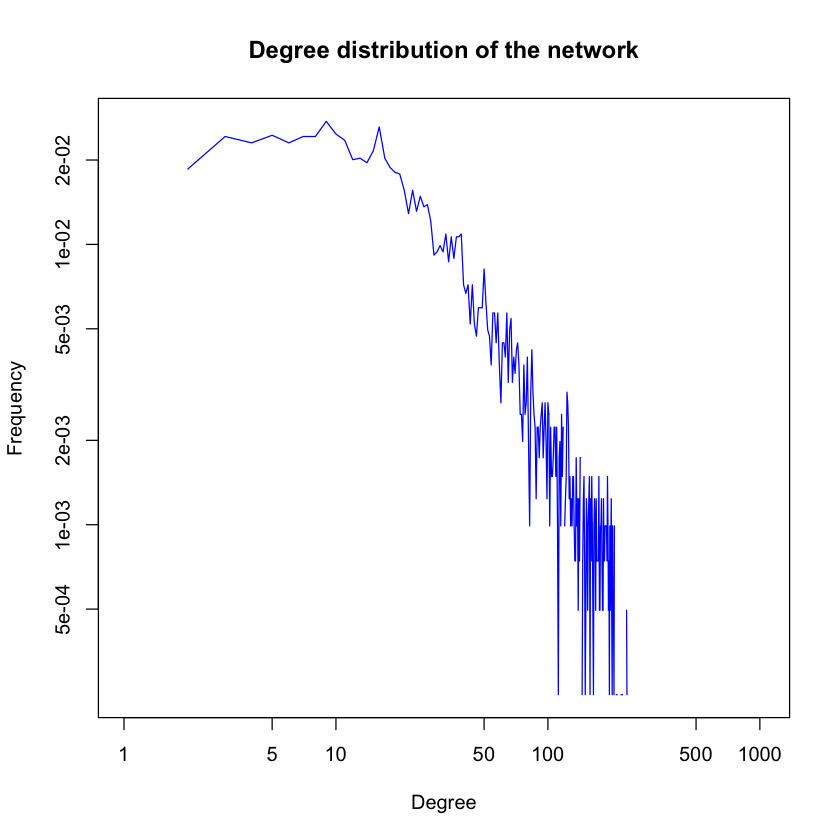

In [18]:
plot(col='blue',degree.distribution(g),type='l',main="Degree distribution of the network",xlab="Degree",ylab="Frequency",log='xy')


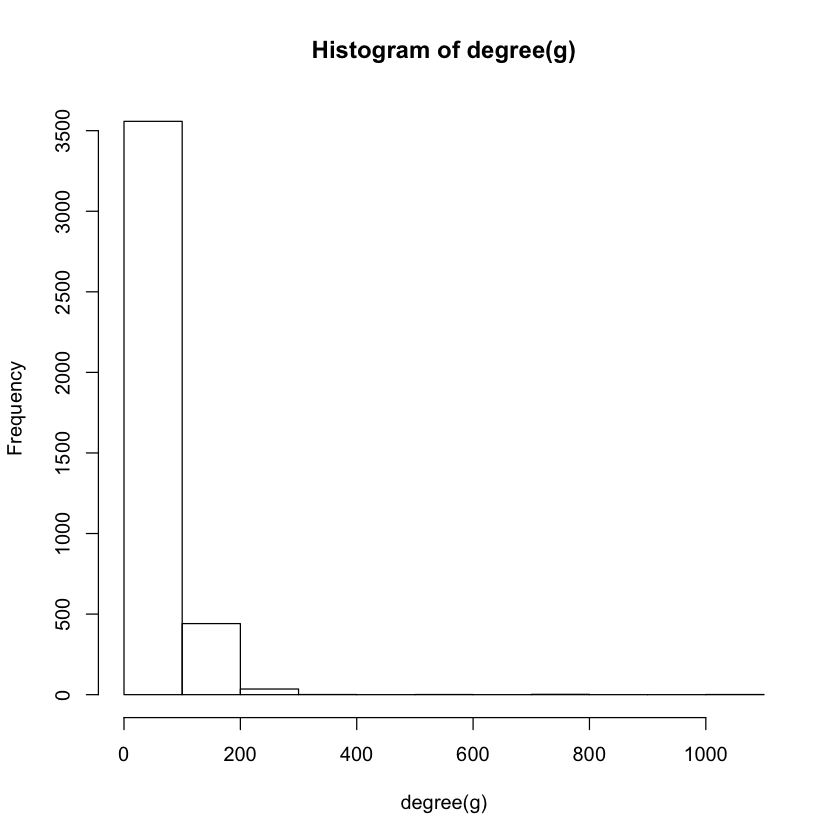

In [19]:
hist(degree(g))

In [20]:
core_nodes= c(1,108,349,484,1087)

Warning message in subgraph(g, c(nodeid, neighbors(graph = g, v = nodeid))):
“At structural_properties.c:1984 :igraph_subgraph is deprecated from igraph 0.6, use igraph_induced_subgraph instead”

Fast greedy modularity : 0.4131014 
EB modularity : 0.3533022 


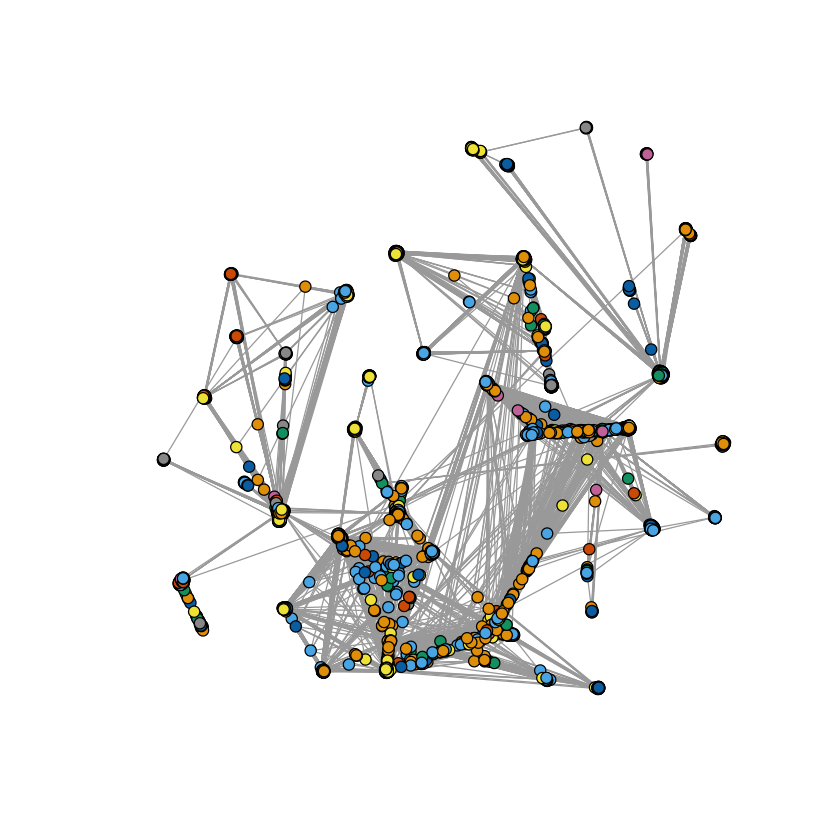

Infomap modularity : 0.3941254 


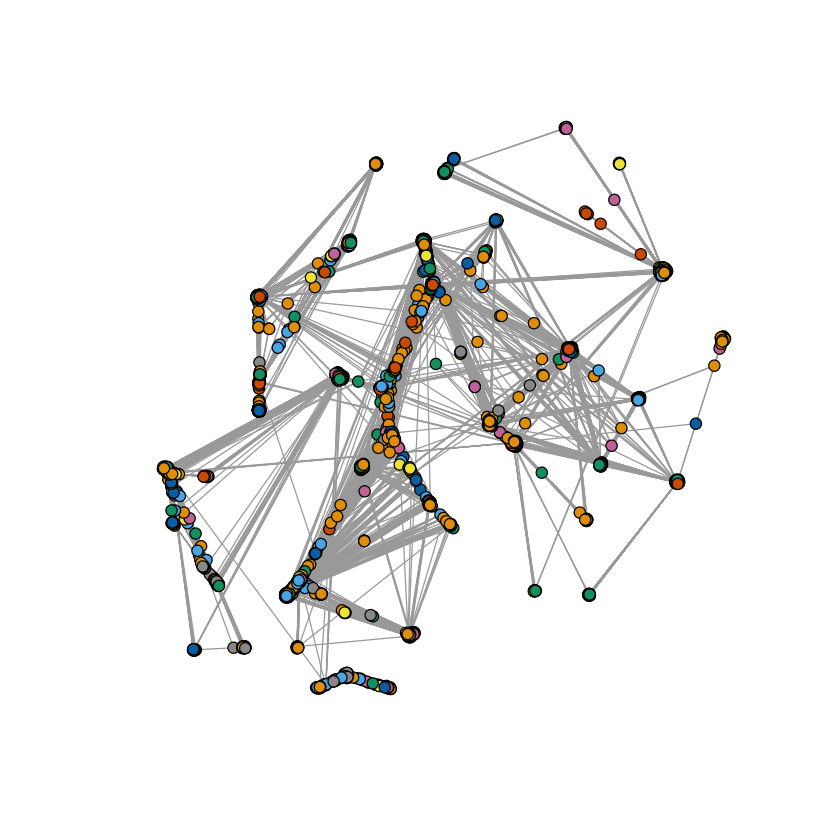

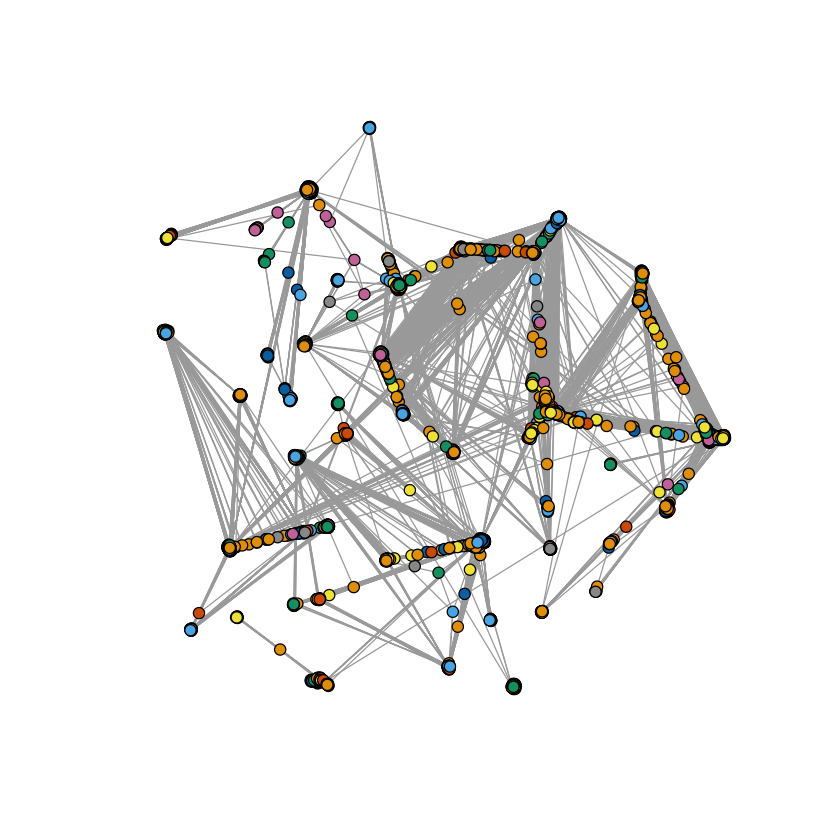

In [29]:
for(nodeid in core_nodes){
    gt = subgraph(g, c(nodeid,neighbors(graph = g,v = nodeid)))
    #plot(gt,vertex.size=4,vertex.label.cex=0.2)
    coords = layout_with_fr(g)

    fg <- cluster_fast_greedy(gt)
    cat("Fast greedy modularity :",modularity(fg),"\n")
    plot(g,vertex.size=4,vertex.color=membership(fg),vertex.label.cex=0.01)

    eb <- cluster_edge_betweenness(gt)
    cat("EB modularity :",modularity(eb),"\n")
    plot(g,vertex.size=4,vertex.color=membership(eb),vertex.label.cex=0.01)

    im <- cluster_infomap(gt)
    cat("Infomap modularity :",modularity(im),"\n")
    plot(g,vertex.size=4,vertex.color=membership(im),vertex.label.cex=0.01)

}

In [22]:
length(neighbors(g,1))

[1] 347

Warning message in subgraph(g, neighbors(graph = g, v = nodeid)):
“At structural_properties.c:1984 :igraph_subgraph is deprecated from igraph 0.6, use igraph_induced_subgraph instead”

Fast greedy modularity : 0.4418533 
EB modularity : 0.4161461 


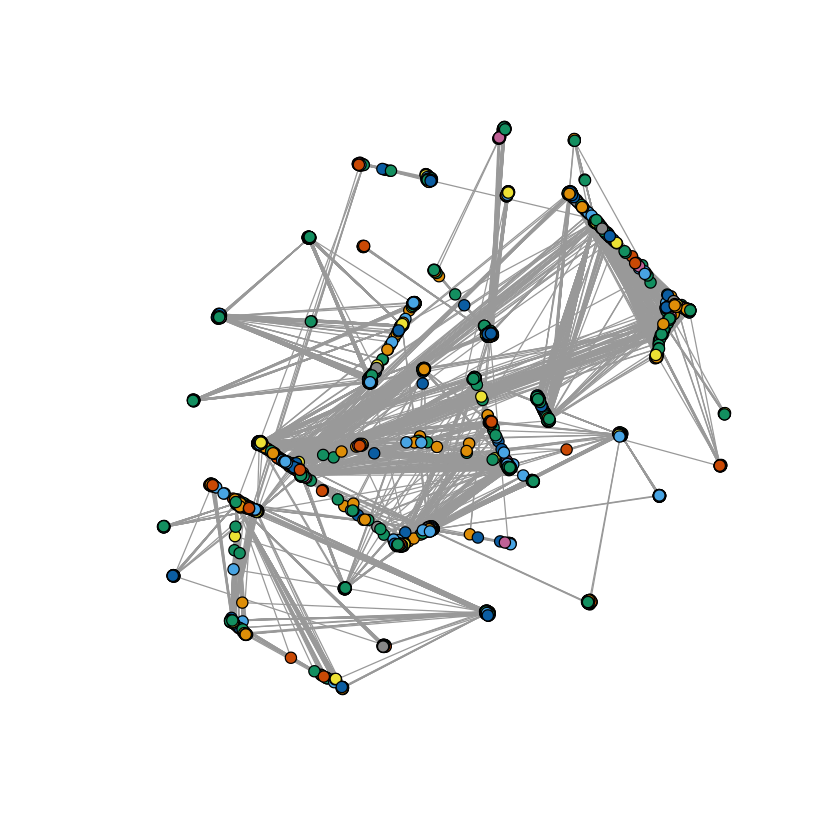

Infomap modularity : 0.4180077 


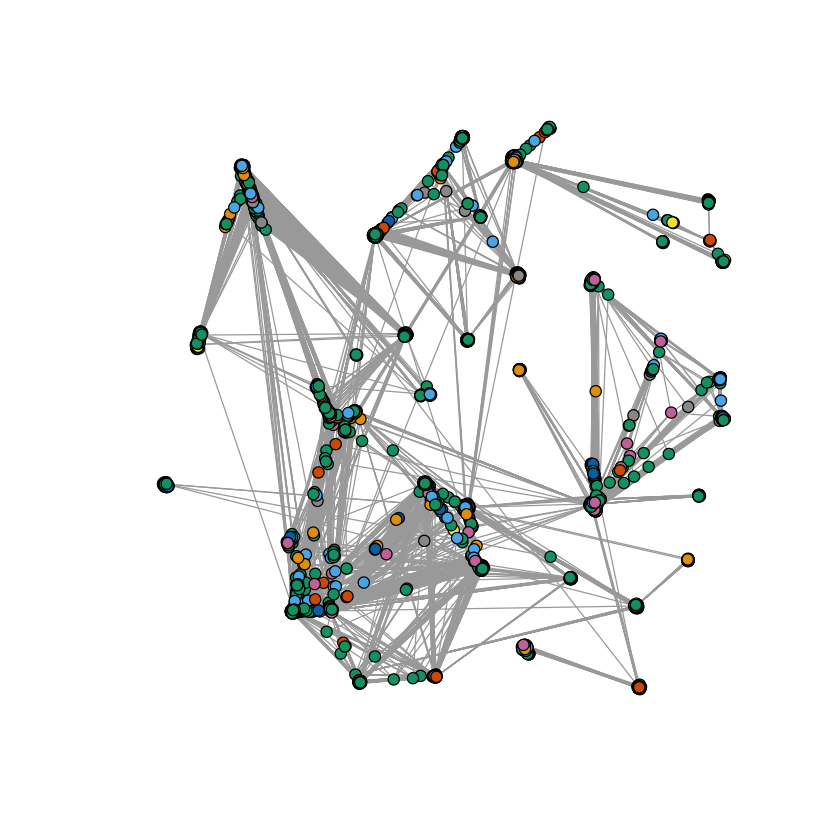

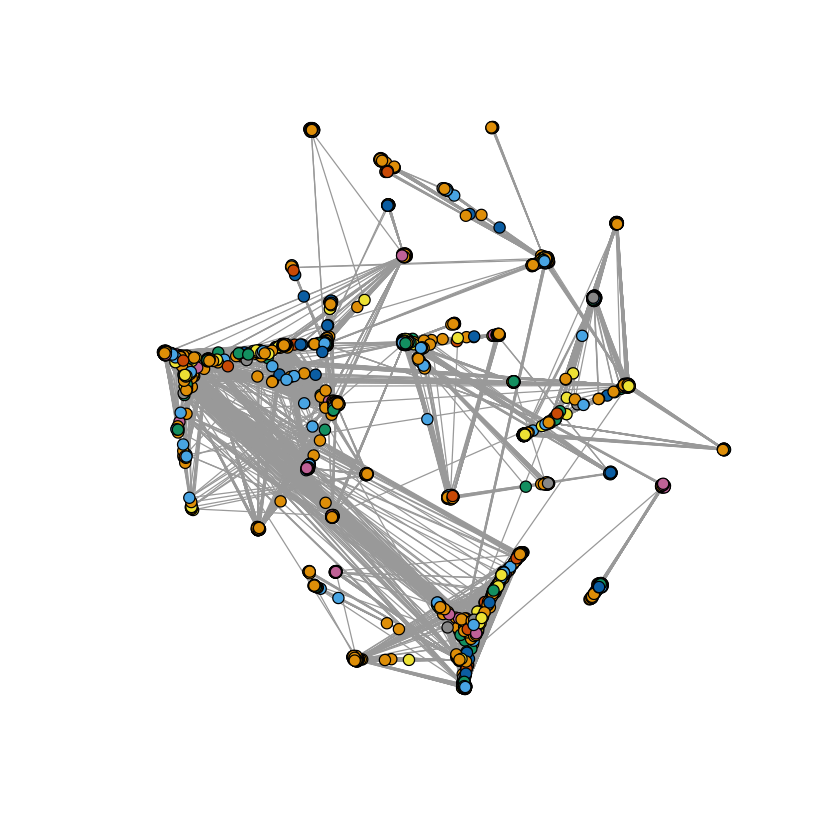

In [30]:
for(nodeid in core_nodes){
    gt = subgraph(g, neighbors(graph = g,v = nodeid))
    #plot(gt,vertex.size=4,vertex.label.cex=0.2)
    coords = layout_with_fr(g)

    fg <- cluster_fast_greedy(gt)
    cat("Fast greedy modularity :",modularity(fg),"\n")
    plot(g,vertex.size=4,vertex.color=membership(fg),vertex.label.cex=0.01)

    eb <- cluster_edge_betweenness(gt)
    cat("EB modularity :",modularity(eb),"\n")
    plot(g,vertex.size=4,vertex.color=membership(eb),vertex.label.cex=0.01)

    im <- cluster_infomap(gt)
    cat("Infomap modularity :",modularity(im),"\n")
    plot(g,vertex.size=4,vertex.color=membership(im),vertex.label.cex=0.01)

}

embeddedness describes how close the neighbors of a vertex are to being a clique and this can be measured by calculating the local clustering coefficient.
https://en.wikipedia.org/wiki/Clustering_coefficient

In [32]:
for(nodeid in core_nodes){
    embed_l =c()
    for(neigh in neighbors(g,nodeid)){
        comm = length(intersect(neighbors(g,nodeid),neighbors(g,neigh)))
        embed_l = c(comm, embed_l)
    }
    print(embed_l)
    h <- hist(embed_l, plot=F, breaks=max(embed_l)-min(embed_l)+1)
plot(h$counts/10000,main="embeded distribution of the network",type = 'l',xlab="Degree",ylab="Frequency",log='xy')


}

  [1]  6 26 15  8 17 33 11  5 26  6  8  2  0 27  7 42 19 15 29  8  3 18 38 25 38
 [26] 71  2 20  7 10  6  1 55 12 36 25  6 12  9 23  3  8  1 54 20 19  2  6 19 10
 [51] 24  6  9  2  2  0 35 13  3  3  0  1 46 15  4  1 15 42  1  9 64 17  9 13  8
 [76] 44 72  3  5 10  1 17 26  4  6  3 37  7  7 14 17  1  1 16  2 64 13  4 23 20
[101]  2 13  4  1  7 23  1  2 58 22  6 36  4  1  1 24 20  8  5  2 14 13  9 27 26
[126] 10  7  3  5  8  7  1  0 16 38 17 29  0  0  6  2  3  1 21 56  3  3 56 46  1
[151] 15 12  8 18  4  4  2  3  6 47 15 43 25 17  1  2  9 19  2 12 10 13 16  3  5
[176] 40  7 45 37 10  6  3 10  2  5  7 24  1 13 24  2 11  2  1  1  4  6 10 13 19
[201]  5  9  1 14 11 42 27 10  8  1 15 21  9 18 17 15  6 15  6 27 15  6  3  3 17
[226] 62 11  3 61 35  5 16 20  0 39  2 13  4 36 12  2  7 13 31 15  5 18  8 12 48
[251]  2  8  5 21  7 20  7  1  7 19 12  5 13 12  6 33  2 22 11  8  5  2 13  0  9
[276] 23  2  1  9  8 75 14 11  6  5 25  2  7 18  3 14 77 16  7 30  1  6 10  3 21
[301]  1  4 11  5  0  1 23 4

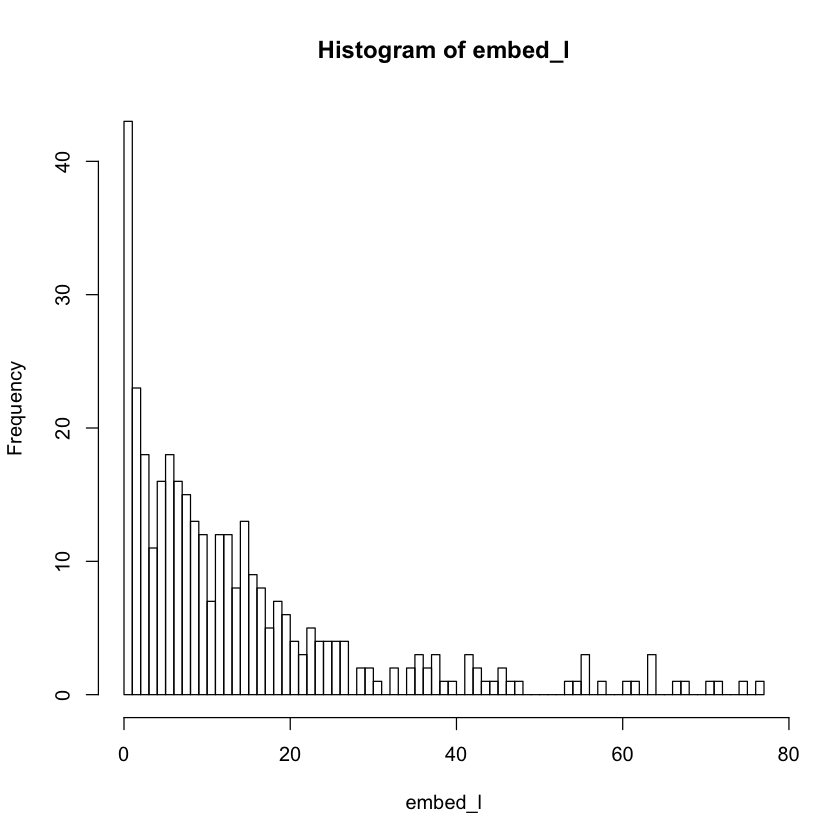

In [35]:
hist(embed_l, breaks=max(embed_l)-min(embed_l)+1)

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“20 y values <= 0 omitted from logarithmic plot”

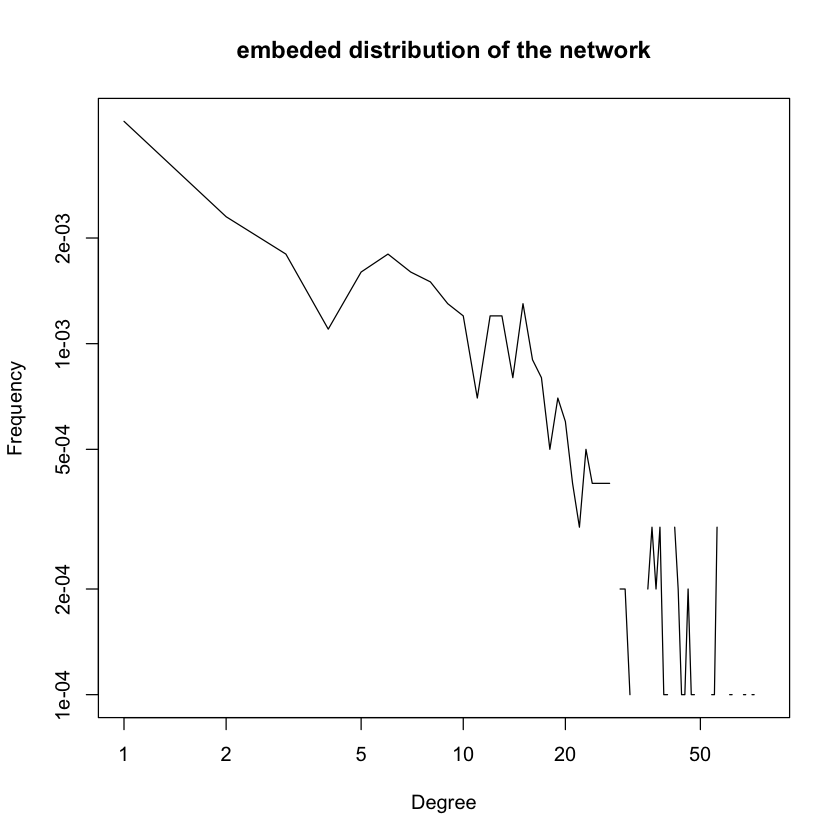